# Proyek Machine Learning (Recommedation System)
M. Ardifa Rizqi Ramadhan

# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Understanding

In [2]:
url = "https://raw.githubusercontent.com/ardifa24/Machine-Learning-Terapan/refs/heads/main/Proyek-Recommendation-System/Coursera.csv"
courses = pd.read_csv(url)
courses.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [3]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [4]:
print("Jumlah nilai unik:")
print("course_name:", courses['Course Name'].nunique())
print("difficulty:", courses['Difficulty Level'].nunique())
print("skills:", courses['Skills'].nunique())
print("course_description:", courses['Course Description'].nunique())

Jumlah nilai unik:
course_name: 3416
difficulty: 5
skills: 3424
course_description: 3397


In [5]:
for name in courses['Course Name'].unique():
    print(name)

Write A Feature Length Screenplay For Film Or Television
Business Strategy: Business Model Canvas Analysis with Miro
Silicon Thin Film Solar Cells
Finance for Managers
Retrieve Data using Single-Table SQL Queries
Building Test Automation Framework using Selenium and TestNG
Doing Business in China Capstone
Programming Languages, Part A
The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process
Business Russian Communication. Part 3
Agile Projects:  Developing Tasks with Taiga
Esports Management Capstone Project
Hacking and Patching
Business Statistics and Analysis Capstone
Grab Data Fast with Vertical and Horizontal LOOKUP
Global Health: An Interdisciplinary Overview
Python Programming Essentials
Creating Dashboards and Storytelling with Tableau
Parallel programming
Recommendation Systems with TensorFlow on GCP
The Changing Arctic
COVID-19 - A clinical update
How to Create Text Effects in GIMP
Preparing for the Google Cloud Professional Data Engineer E

In [6]:
courses['University'].value_counts()

,count
University,
Coursera Project Network,562
University of Illinois at Urbana-Champaign,138
Johns Hopkins University,110
University of Colorado Boulder,101
University of Michigan,101
...,...
University of Nebraska,1
Pontificia Universidad Cat�lica de Chile,1
VMware,1


                  Jumlah Sampel  Persentase (%)
Difficulty Level                               
Beginner                   1444            41.0
Advanced                   1005            28.5
Intermediate                837            23.8
Conversant                  186             5.3
Not Calibrated               50             1.4


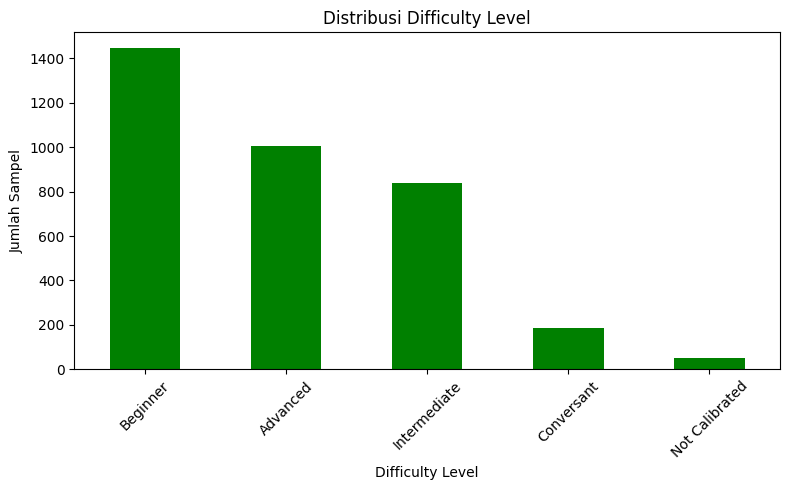

In [7]:
feature = 'Difficulty Level'

count = courses[feature].value_counts()
percent = 100 * courses['Difficulty Level'].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah Sampel': count,'Persentase (%)': percent.round(1)})
print(df)

count.plot(kind='bar', title=f'Distribusi {feature}', ylabel='Jumlah Sampel', xlabel=feature, color='green', figsize=(8,5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mayoritas kursus ditujukan untuk pemula (Beginner) dengan 41% (1444 kursus), menunjukkan fokus platform pada pembelajaran tingkat dasar.

**menunjukkan target utamanya adalah pengguna yang baru memulai pembelajaran di bidang tertentu. Ini bisa menjadi pertimbangan penting bagi lembaga pendidikan yang ingin menyasar segmen pemula.**

# Data Preparation




## Handling Missing Value

In [8]:
courses.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


## Feature Selection

In [9]:
course = courses[['Course Name','Course Description', 'Skills']]
course.head()

,Course Name,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## Column Renaming

In [10]:
course = course.rename(columns={'Course Name': 'Course_Name',
                                'Course Description': 'Course_Description',
                                'Skills': 'Skills'})
course.head()

,Course_Name,Course_Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


# Model Development with Content Based Filtering

In [11]:
course.sample(5)

,Course_Name,Course_Description,Skills
2696,FPGA Softcore Processors and IP Acquisition,This course will introduce you to all aspects ...,recursively enumerable set verification and v...
1376,Dynamical Modeling Methods for Systems Biology,An introduction to dynamical modeling techniqu...,computational biology Stochastic Calculus mo...
1678,Entrepreneurship I: Laying the Foundation,This course will explore the earlier stages of...,market (economics) leadership entrepreneuria...
2305,AI Workflow: Business Priorities and Data Inge...,This is the first course of a six part special...,process modeling ingestion modeling ordered...
2919,"GIS Data Formats, Design and Quality","In this course, the second in the Geographic I...",ArcGIS Geographic Information System analysi...


## TF-IDF Vectorizer

In [12]:
tf = TfidfVectorizer(stop_words='english')

tf.fit(course['Course_Name'])

tf.get_feature_names_out()

array(['000', '10', '101', ..., 'zap', 'zero', 'zoning'], dtype=object)

In [13]:
tfidf_matrix = tf.fit_transform(course['Course_Name'])

tfidf_matrix.shape

(3522, 3499)

In [14]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=course.Skills
).sample(10, axis=1).sample(10, axis=0)

,federalism,circadian,low,stories,biochemical,acquiring,collaborative,spaces,comparing,administration
Skills,,,,,,,,,,
3d lookup table boolean network binary decision diagram logic logic gate lambda cube Algebra boolean algebra computer-aided design Digital Design computer-science algorithms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
microsoft project Average Project Management Risk Management project finance model Leadership and Management Risk project Construction Management project governance physical-science-and-engineering mechanical-engineering,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
customer satisfaction energy Leadership and Management renewable energy Energy Efficiency Electrical Engineering generation utility microgrid smart grid physical-science-and-engineering environmental-science-and-sustainability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
public key certificate key exchange public-key cryptography cipher Cryptography discrete logarithm key management public key infrastructure shared secret integer factorization computer-science computer-security-and-networks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Web Development web application php HTML5 web php syntax and semantics syntax html HTML and CSS CSS computer-science mobile-and-web-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
relative change and difference Electrical Engineering Operations Management linux on embedded systems real-time operating systems augmented assignment error detection and correction embedded linux Type I And Type Ii Errors mathematical optimization physical-science-and-engineering electrical-engineering,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
project Deep Learning Loss Function Artificial Neural Networks Computer Vision Machine Learning ordered pair Tensorflow p-value Python Programming data-science machine-learning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
constraint programming mathematical optimization kripke semantics semantics job shop scheduling symmetry-breaking constraints enabling Geometry discrete optimization data structure alignment computer-science software-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Social Media social media marketing use case Advertising software project Chart content creation web Spreadsheet Software business marketing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [16]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.19172254, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.1534438 , 0.        ,
        0.        ],
       [0.19172254, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.1534438 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [17]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=course['Course_Name'], columns=course['Course_Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(20, axis=1).sample(20, axis=0)

Shape: (3522, 3522)


Course_Name,Business of Games and Entrepreneurship,Introduction to Cybersecurity Tools & Cyber Attacks,Foundations of Mindfulness,Analysing Complexity,Python for Data Science and AI,Mindware: Critical Thinking for the Information Age,Create a Buy Signal using RSI in R with the Quantmod Package,Types of Conflict,"Fundamentals of Funding, with Goldman Sachs 10,000 Women",Packet Switching Networks and Algorithms,Confronting Gender Based Violence: Global Lessons for Healthcare Workers,Agile Analytics,Digitalisation in Space Research,"Introduction to Blockchain: Benefits, Values and Opportunities",Current Gen 3D Game Prop Production,Business Strategy,Capstone: Build a Winning Investment Portfolio,Skepticism,Building Conversational Experiences with Dialogflow,Quick resumeCreator with JavaScript
Course_Name,,,,,,,,,,,,,,,,,,,,
"Big Data, Genes, and Medicine",0.000000,0.000000,0.000000,0.0,0.119607,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
"Algorithms, Part II",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.313241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Finance for Non-Financial Professionals,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Build a Twitter Clone Backend,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.122253,0.0,0.0,0.0
Psychodiagnostics and Psychological Assessment,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Diode - pn Junction and Metal Semiconductor Contact,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Check Point Jump Start: Network Security,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
eHealth: More than just an electronic record,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Managing an Agile Team,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.460476,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


## Function Recommendation

In [20]:
def course_recommendations(nama_course, similarity_data=cosine_sim_df, items=course[['Course_Name','Course_Description', 'Skills']], k=5):
    """
    Rekomendasi course berdasarkan kemiripan dengan course lainnya.

    Parameter:
    - nama_course : nama course (str)
    - similarity_data : DataFrame similarity (simetris)
    - items : DataFrame course dan metadatanya
    - k : jumlah rekomendasi (int)

    Output:
    - DataFrame course rekomendasi dengan metadata
    """
    if nama_course not in similarity_data.columns:
        return f"Course '{nama_course}' tidak ditemukan dalam data."

    closest = similarity_data[nama_course].sort_values(ascending=False).iloc[1:k+1].index

    closest = closest[closest != nama_course]

    return items[items['Course_Name'].isin(closest)].reset_index(drop=True)


In [21]:
course_recommendations('Predictive Analytics and Data Mining')

,Course_Name,Course_Description,Skills
0,Predictive Modeling and Analytics,Welcome to the second course in the Data Analy...,Logistic Regression analytics predictive ana...
1,Data Mining Project,Note: You should complete all the other course...,ordered pair tableau software Similarity Mea...
2,Design Thinking and Predictive Analytics for D...,This is the second course in the four-course s...,Logistic Regression supervised learning grad...
3,Text Mining and Analytics,This course will cover the major techniques fo...,probability Topic Model Natural Language Pro...
4,Population Health: Predictive Analytics,Predictive analytics has a longstanding tradit...,sample size determination prognostics extern...
